# DATASET «READING HABITS»

Данный датасет содержит информацию о стиле чтения и читательских привычках. Основа датасета – опрос более 2500  человек. Набор данных содержит информацию о количестве людей, читающих печатные книги, аудиокниги, электронные книги, а также о тех, кто отдает предпочтение журналам и газетам. Датасет может помочь определить зависимости между различными показателями, такими как возраст, доход и образование, и чтением.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_read_full = pd.read_csv('Reading_habit.csv')
data = df_read_full

#импортируем наш датасет для анализа

# Знакомство с датасетом

In [4]:
df_read_full.shape
#Наш датасет имеет 2832 записи и 14 колонок

(2832, 14)

In [5]:
df_read_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

В некоторых строчках есть пропуски: в вопросах с 7 по 11 количество ответов равно 2442. В целом, есть 14 показателей, по которым мы будем анализировать датасет. Преобладающий тип данных - строковый (object).

Для удобства переименуем колонки датасета

In [6]:
df_read_full = pd.DataFrame(data, columns = ['Age', 
                                        'Sex', 
                                        'Race',
                                        'Marital status?', 
                                        'Education', 
                                        'Employement', 
                                        'Incomes', 
                                        'How many books did you read during last 12months?', 
                                        'Read any printed books during last 12months?', 
                                        'Read any audiobooks during last 12months?', 
                                        'Read any e-books during last 12months?', 
                                        'Last book you read, you…', 
                                        'Do you happen to read any daily news or newspapers?', 
                                        'Do you happen to read any magazines or journals?'])

In [7]:
df_read_full.rename (columns = {'Age': 'Возраст',
                           'Sex': 'Пол',
                           'Race': 'Расовая принадлежность',
                           'Marital status?': 'Семейное положение',
                           'Education': 'Уровень образования',
                           'Employement': 'Трудоустройство',
                           'Incomes': 'Доход',
                           'How many books did you read during last 12months?': 'Количество прочитанных книг за год',
                           'Read any printed books during last 12months?': 'Чтение печатных книг за год',
                           'Read any audiobooks during last 12months?': 'Прослушивание аудиокниг за год',
                           'Read any e-books during last 12months?': 'Чтение электронных книг за год',
                           'Last book you read, you…': 'Откуда последняя прочитанная книга',
                           'Do you happen to read any daily news or newspapers?': 'Чтение новостей или газет',
                           'Do you happen to read any magazines or journals?': 'Чтение журналов'
                           }, inplace = True)

In [8]:
df_read_full.columns

#Проверяем, все ли получилось

Index(['Возраст', 'Пол', 'Расовая принадлежность', 'Семейное положение',
       'Уровень образования', 'Трудоустройство', 'Доход',
       'Количество прочитанных книг за год', 'Чтение печатных книг за год',
       'Прослушивание аудиокниг за год', 'Чтение электронных книг за год',
       'Откуда последняя прочитанная книга', 'Чтение новостей или газет',
       'Чтение журналов'],
      dtype='object')

In [9]:
df_read_full.iloc[50:80]
#Выведем конкретные ряды и посмотрим на данные с помощью среза

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов
50,65,Female,White,Divorced,"Some college, no 4-year degree",Retired,"$20,000 to under $30,000",97,Yes,No,No,Borrowed the book from a library,Yes,Yes
51,64,Female,White,Married,Post-graduate training/professional school aft...,Retired,"$100,000 to under $150,000",97,Yes,No,Yes,Purchased the book,Yes,Yes
52,64,Male,White,Married,Post-graduate training/professional school aft...,Retired,"$100,000 to under $150,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
53,64,Female,White,Widowed,High school graduate,Retired,Refused,97,Yes,Yes,Yes,Purchased the book,Yes,Yes
54,64,Male,White,Married,College graduate,Employed full-time,"$100,000 to under $150,000",97,Yes,No,Yes,Purchased the book,Yes,Yes
55,63,Female,White,Married,Post-graduate training/professional school aft...,Retired,"$75,000 to under $100,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
56,63,Female,White,Divorced,"Some college, no 4-year degree",Employed full-time,"$50,000 to under $75,000",97,Yes,No,No,Purchased the book,Yes,Yes
57,62,Female,White,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
58,60,Female,White,Widowed,College graduate,Employed full-time,"$100,000 to under $150,000",97,Yes,Yes,Yes,Purchased the book,No,Yes
59,60,Female,White,Single,College graduate,Employed full-time,"$50,000 to under $75,000",97,Yes,Yes,Yes,Borrowed the book from a library,Yes,Yes


# Работа с пропущенными значениями

In [159]:
df_read_full.info()

#Мы видим, что в некоторых колонках есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Возраст                             2832 non-null   int64 
 1   Пол                                 2832 non-null   object
 2   Расовая принадлежность              2832 non-null   object
 3   Семейное положение                  2832 non-null   object
 4   Уровень образования                 2832 non-null   object
 5   Трудоустройство                     2832 non-null   object
 6   Доход                               2832 non-null   object
 7   Количество прочитанных книг за год  2832 non-null   int64 
 8   Чтение печатных книг за год         2442 non-null   object
 9   Прослушивание аудиокниг за год      2442 non-null   object
 10  Чтение электронных книг за год      2442 non-null   object
 11  Откуда последняя прочитанная книга  2442 non-null   obje

In [160]:
df_read_full.isna().sum()

#Таким образом, определяем, в каких колонках и сколько пропусков имеется
#Чтение печатных книг за год,Прослушивание аудиокниг за год, Чтение электронных книг за год, Откуда последняя прочитанная книга
#Все эти столбцы имеют одинковое количество пропусков - 390. 

Возраст                                 0
Пол                                     0
Расовая принадлежность                  0
Семейное положение                      0
Уровень образования                     0
Трудоустройство                         0
Доход                                   0
Количество прочитанных книг за год      0
Чтение печатных книг за год           390
Прослушивание аудиокниг за год        390
Чтение электронных книг за год        390
Откуда последняя прочитанная книга    390
Чтение новостей или газет               0
Чтение журналов                         0
dtype: int64

В нашем датасете пропуски **составляют 14%**. Заполнение пропусков в нашем случае медианой или средним значением **не так уж целесообразно**, так как у всех людей совершенно разные предпочтения по чтению, разные темпы и возможноти. Таким образом, логичнее **избавиться от пропусков** для дальнейшего анализа. 

In [161]:
df_read = df_read_full.dropna(subset = {'Чтение печатных книг за год', 
                         'Прослушивание аудиокниг за год', 
                         'Чтение электронных книг за год', 
                         'Откуда последняя прочитанная книга'})

#сохраняем в качестве новой переменной и проверяем количество данных.

In [162]:
df_read.shape

(2442, 14)

Необходимо узнать, какие ответы есть в небинарных столбцах. Используем команду .unique

In [163]:
df_read_full['Возраст'].unique()

array([66, 46, 32, 27, 16, 55, 63, 60, 50, 29, 23, 19, 89, 88, 84, 81, 80,
       79, 78, 77, 76, 75, 73, 71, 70, 69, 68, 67, 65, 64, 62, 59, 58, 57,
       56, 54, 53, 52, 45, 44, 42, 41, 40, 38, 37, 36, 35, 34, 33, 30, 28,
       26, 25, 24, 22, 21, 20, 18, 17, 48, 47, 74, 61, 39, 31, 51, 90, 83,
       72, 49, 86, 82, 43, 85, 91, 87, 93, 92], dtype=int64)

In [164]:
df_read_full['Возраст'].mode()

#Узнав моду данного признака, можно сделать вывод, что большая часть опрошенных являются представителями более старшего поколения


0    50
Name: Возраст, dtype: int64

In [165]:
df_read['Возраст'].min() #16 - минимальный возраст среди опрошенных

16

In [166]:
df_read['Возраст'].max() #93 - максимальный возраст среди опрошенных

93

In [167]:
df_read['Расовая принадлежность'].unique()

array(['Refused', 'Native American/American Indian', 'Mixed race',
       'Asian or Pacific Islander', 'Black or African-American', 'White',
       'Don’t know', 'Other'], dtype=object)

In [168]:
df_read['Расовая принадлежность'].value_counts()

#Превалирующее число опрошенных определяют себя в качестве "White"

White                              1927
Black or African-American           282
Asian or Pacific Islander            62
Mixed race                           55
Other                                48
Refused                              35
Native American/American Indian      24
Don’t know                            9
Name: Расовая принадлежность, dtype: int64

In [169]:
df_read['Семейное положение'].unique()

array(['Divorced', 'Married', 'Never been married', 'Widowed',
       'Don’t know', 'Living with a partner', 'Single', 'Separated'],
      dtype=object)

In [170]:
df_read['Семейное положение'].value_counts()

#Более половины опрошенных находятся в браке.

Married                  1333
Never been married        540
Divorced                  196
Widowed                   153
Living with a partner     121
Single                     48
Separated                  36
Don’t know                 15
Name: Семейное положение, dtype: int64

In [171]:
df_read['Уровень образования'].unique()

#Исходя из этих данных, мы сделали градацию по уровню образованиия от самого высокого в этом списке, до самого низкого:
#Post-graduate training/professional school after college,
#College graduate,
#Technical, trade or vocational school AFTER high school,
#Some college, no 4-year degree,
#High school graduate,
#High school incomplete, 
#None

array(['College graduate', 'High school graduate',
       'High school incomplete', 'Some college, no 4-year degree',
       'Post-graduate training/professional school after college',
       'Technical, trade or vocational school AFTER high school', 'None',
       'Don’t know'], dtype=object)

In [172]:
df_read['Уровень образования'].mode()
#Узнаем, какой уровень образования у большинства опрошенных
#Модой является неоконченное обучение в колледже. Однако, есть основания полагать, что пристуствует бимодальность

0    Some college, no 4-year degree
Name: Уровень образования, dtype: object

In [173]:
df_read['Уровень образования'].value_counts()

#Категория "College graduate" лишь не на много отстает от моды и в целом тоже является одним из популярных значений.
#Среди опрошенных очень маленький процент тех, кто не имеет образования или не знает, какой уровень образования имеют

Some college, no 4-year degree                              579
College graduate                                            568
High school graduate                                        522
Post-graduate training/professional school after college    485
High school incomplete                                      205
Technical, trade or vocational school AFTER high school      49
None                                                         30
Don’t know                                                    4
Name: Уровень образования, dtype: int64

In [174]:
df_read['Трудоустройство'].unique()

array(['Retired', 'Employed full-time', 'Employed part-time',
       'Have own business/self-employed', 'Student', 'Other',
       'Not employed for pay', 'Disabled'], dtype=object)

In [175]:
df_read['Доход'].unique()

array(['$20,000 to under $30,000', 'Less than $10,000',
       '$40,000 to under $50,000', '$10,000 to under $20,000',
       '$50,000 to under $75,000', '$100,000 to under $150,000',
       '$75,000 to under $100,000', '9$100,000 to under $150,000',
       '$30,000 to under $40,000', 'Refused'], dtype=object)

In [176]:
df_read['Доход'].value_counts()
#Превалируют в исследовании люди, имеющие один из самых высоких доходов из предложенных вариантов

$100,000 to under $150,000     503
$50,000 to under $75,000       353
$75,000 to under $100,000      286
Refused                        246
$30,000 to under $40,000       224
$20,000 to under $30,000       200
$40,000 to under $50,000       182
9$100,000 to under $150,000    173
$10,000 to under $20,000       158
Less than $10,000              117
Name: Доход, dtype: int64

In [177]:
df_read['Количество прочитанных книг за год'].unique()

array([97, 96, 90, 84, 80, 76, 75, 70, 67, 65, 60, 55, 54, 52, 51, 50, 48,
       47, 45, 43, 42, 40, 38, 37, 36, 35, 32, 30, 26, 25, 24, 23, 22, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1], dtype=int64)

In [178]:
df_read['Количество прочитанных книг за год'].mode()

#290 опрошенных прочитали 3 книги за год, что сделало 3 модой данного признака. 

0    3
Name: Количество прочитанных книг за год, dtype: int64

In [179]:
df_read['Количество прочитанных книг за год'].value_counts()

3     209
6     172
2     169
5     167
4     166
10    162
20    159
12    159
1     149
97    124
30    109
50    108
15    103
25     82
8      69
40     53
7      49
24     35
60     19
36     16
35     15
96     15
75     14
13     12
9      11
16     11
18     10
70     10
14      9
45      7
17      6
80      6
48      5
11      4
32      3
55      3
90      2
26      2
52      2
65      2
47      2
19      1
51      1
84      1
54      1
76      1
43      1
42      1
38      1
67      1
37      1
22      1
23      1
Name: Количество прочитанных книг за год, dtype: int64

In [180]:
df_read['Откуда последняя прочитанная книга'].unique()

array(['Purchased the book',
       'Borrowed the book from a friend or family member',
       'Borrowed the book from a library', 'Got the book some other way',
       '8', '9'], dtype=object)

In [181]:
df_read['Откуда последняя прочитанная книга'].value_counts()

#Большинство (с большим отрывом) опрошенных предпочитают покупать книги, остальные берут у друзей или в библиотеке
#возможно, это был открытый вопрос, так как в данных есть совсем не понятные ответы "8" или "9".

Purchased the book                                  1266
Borrowed the book from a friend or family member     501
Borrowed the book from a library                     335
Got the book some other way                          309
8                                                     25
9                                                      6
Name: Откуда последняя прочитанная книга, dtype: int64

# Создание новых переменных и перекодирование в бинарные данные

В нашем датасете есть несколько вопросов в двумя возможными ответами - "Да" или "Нет". Мы можем перекодировать ответы, оставив только 0 и 1 в качестве ответов, а также изменить тип переменной на dtype: int64

In [182]:
df_read.head()

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [183]:
df_read['Чтение печатных книг за год'] = df_read['Чтение печатных книг за год'].apply(lambda x: 1 if x == 'Yes' else 0)

pd.options.mode.chained_assignment = None  #код позволил убрать высвечивающуся ошибку (сохранение переменной в таком виде было преложено в курсе)

In [184]:
df_read['Прослушивание аудиокниг за год'] = df_read['Прослушивание аудиокниг за год'].apply(lambda x: 1 if x == 'Yes' else 0)

In [185]:
df_read['Чтение электронных книг за год'] = df_read['Чтение электронных книг за год'].apply(lambda x: 1 if x == 'Yes' else 0)

In [186]:
df_read['Чтение новостей или газет'] = df_read['Чтение новостей или газет'].apply(lambda x: 1 if x == 'Yes' else 0)

In [187]:
df_read['Чтение журналов'] = df_read['Чтение журналов'].apply(lambda x: 1 if x == 'Yes' else 0)

In [188]:
df_read

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,1,0,1,Purchased the book,0,1
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,1,1,1,Purchased the book,1,1
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,0,1,1,Borrowed the book from a friend or family member,1,1
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,1,0,1,Borrowed the book from a library,1,0
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,1,1,0,Purchased the book,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,16,Female,White,Never been married,High school incomplete,Not employed for pay,"$30,000 to under $40,000",1,1,0,0,Purchased the book,0,0
2438,16,Female,White,Never been married,High school incomplete,Not employed for pay,"Less than $10,000",1,1,0,0,Borrowed the book from a library,0,0
2439,16,Male,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",1,0,0,0,Got the book some other way,1,0
2440,16,Female,White,Never been married,High school incomplete,Employed part-time,"9$100,000 to under $150,000",1,1,0,0,Borrowed the book from a friend or family member,0,1


**Попробуем создать переменную «Настоящий читатель» для тех, кто соответствует всем условиям чтения**: прочитал хотя бы одну книгу за год, читает и печатные, и электронные книги, слушает аудиокниги, увлекается чтением журналов и газет

In [189]:
np.where((df_read['Количество прочитанных книг за год'] > 0) & 
         (df_read['Чтение печатных книг за год'] == 1) &
         (df_read['Прослушивание аудиокниг за год'] == 1) &
         (df_read['Чтение электронных книг за год'] == 1) &
         (df_read['Чтение новостей или газет'] == 1) &
         (df_read['Чтение журналов'] == 1)) 

(array([   1,   52,   53,   55,   57,   59,   70,   80,   95,  100,  104,
         114,  126,  135,  142,  161,  173,  186,  188,  195,  220,  228,
         239,  245,  258,  263,  276,  291,  294,  323,  326,  335,  345,
         349,  350,  360,  362,  379,  392,  393,  397,  407,  427,  464,
         466,  467,  501,  524,  546,  565,  568,  589,  595,  645,  648,
         676,  692,  711,  743,  752,  764,  765,  779,  812,  842,  856,
         882,  915,  928, 1025, 1070, 1116, 1125, 1139, 1175, 1192, 1244,
        1262, 1305, 1331, 1415, 1418, 1480, 1550, 1619, 1642, 1655, 1671,
        1706, 1708, 1758, 1848, 1872, 1940, 1990, 1994, 2050], dtype=int32),)

In [190]:
df_read['Настоящий читатель'] = np.where((df_read['Количество прочитанных книг за год'] > 0) & 
                                       (df_read['Чтение печатных книг за год'] == 1) &
                                       (df_read['Прослушивание аудиокниг за год'] == 1) &
                                       (df_read['Чтение электронных книг за год'] == 1) &
                                       (df_read['Чтение новостей или газет'] == 1) &
                                       (df_read['Чтение журналов'] == 1), 1,0)

**Сколько в нашем датасете людей, очень заинтересованных в чтении?**

In [191]:
df_read['Настоящий читатель'].sum()

97

Почти 4% опрошенных соответствуют поставленным условиям

**Попробуем создать переменную, в которой будут отражаться только те, кто интересуется переодикой (чтением газет и журналов)**

In [192]:
np.where((df_read['Чтение новостей или газет'] == 1) &
         (df_read['Чтение журналов'] == 1))

(array([   1,    2,    7,   10,   11,   13,   15,   16,   17,   21,   22,
          24,   25,   26,   27,   28,   30,   31,   32,   33,   35,   36,
          37,   38,   39,   40,   45,   46,   47,   48,   49,   50,   51,
          52,   53,   54,   55,   56,   57,   59,   60,   61,   63,   64,
          65,   67,   69,   70,   73,   74,   77,   79,   80,   82,   83,
          84,   86,   88,   89,   91,   94,   95,   98,  100,  104,  105,
         106,  113,  114,  115,  116,  122,  124,  125,  126,  133,  135,
         136,  137,  141,  142,  148,  151,  153,  156,  157,  159,  160,
         161,  165,  172,  173,  175,  176,  179,  180,  182,  183,  186,
         187,  188,  189,  190,  191,  192,  193,  195,  199,  205,  206,
         208,  212,  213,  217,  218,  219,  220,  222,  224,  226,  227,
         228,  229,  230,  231,  236,  239,  240,  243,  245,  247,  249,
         250,  251,  254,  255,  258,  262,  263,  265,  266,  267,  272,
         273,  276,  279,  287,  288, 

In [193]:
df_read['Любитель периодической печати'] = np.where((df_read['Чтение новостей или газет'] == 1) &
                                                    (df_read['Чтение журналов'] == 1), 1,0)

In [194]:
df_read.head()

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов,Настоящий читатель,Любитель периодической печати
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,1,0,1,Purchased the book,0,1,0,0
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,1,1,1,Purchased the book,1,1,1,1
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,0,1,1,Borrowed the book from a friend or family member,1,1,0,1
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,1,0,1,Borrowed the book from a library,1,0,0,0
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,1,1,0,Purchased the book,1,0,0,0


**Сколько в нашем датасете любителей периодической печати?**

In [195]:
df_read['Любитель периодической печати'].sum()

999

Таким образом, в нашем датасете около 41% тех, кто любит читать газеты и журналы

**Создадим категориальную переменную «Уровень дохода», распределив данные по категориям**

In [196]:
def get_cat_income(income):
    if income == 'Less than $10,000':
        return 'Низкий'
    elif income == '$10,000 to under $20,000':
        return 'Средний'
    elif income == '$20,000 to under $30,000':
        return 'Средний'
    elif income == '$30,000 to under $40,000':
        return 'Выше среднего'
    elif income == '$40,000 to under $50,000':
        return 'Выше среднего'
    elif income == '$50,000 to under $75,000':
        return 'Выше среднего'
    elif income == '$75,000 to under $100,000':
        return 'Высокий'
    elif income == '$100,000 to under $150,000':
        return 'Очень высокий'
    elif income == '9$100,000 to under $150,000':
        return 'Очень высокий'
    elif income == 'Refused':
        return  'Refused'

In [197]:
df_read['Уровень дохода'] = df_read['Доход'].apply(get_cat_income)

In [198]:
df_read['Уровень дохода'] = pd.Categorical (df_read['Уровень дохода'])

In [199]:
df_read['Уровень дохода'].unique()

#У нас получилось 5 категорий (6 не учитваем из-за того, что респонденты отказались дать ответ)

['Средний', 'Низкий', 'Выше среднего', 'Очень высокий', 'Высокий', 'Refused']
Categories (6, object): ['Refused', 'Высокий', 'Выше среднего', 'Низкий', 'Очень высокий', 'Средний']

In [200]:
df_read['Уровень дохода'].value_counts()

Выше среднего    759
Очень высокий    676
Средний          358
Высокий          286
Refused          246
Низкий           117
Name: Уровень дохода, dtype: int64

In [201]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2442 entries, 0 to 2441
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Возраст                             2442 non-null   int64   
 1   Пол                                 2442 non-null   object  
 2   Расовая принадлежность              2442 non-null   object  
 3   Семейное положение                  2442 non-null   object  
 4   Уровень образования                 2442 non-null   object  
 5   Трудоустройство                     2442 non-null   object  
 6   Доход                               2442 non-null   object  
 7   Количество прочитанных книг за год  2442 non-null   int64   
 8   Чтение печатных книг за год         2442 non-null   int64   
 9   Прослушивание аудиокниг за год      2442 non-null   int64   
 10  Чтение электронных книг за год      2442 non-null   int64   
 11  Откуда последняя прочитанная к

# Рассчет мер центральной тенденции

**Рассчитаем меры центральной тенденции для признака "Количество прочитанных книг за год"** (это единственная переменная, для которой возможен рассчет (не считая возраста)

In [202]:
df_read['Количество прочитанных книг за год'].mean() #среднее арифметическое

19.33947583947584

In [203]:
df_read['Количество прочитанных книг за год'].median()   #медиана

10.0

In [204]:
df_read['Количество прочитанных книг за год'].mode()   #мода

0    3
Name: Количество прочитанных книг за год, dtype: int64

Судя по результатам рассчета, получившаяся мода меньше медианы, а медиана меньше среднего. Таким образом, мы имеем дело с **положительно ассиметричным унимодальным распределением (скошенным вправо)**. 

# Меры вариативности

Найдем разницу между максимальным и миниимальным значениями

In [205]:
df_read['Количество прочитанных книг за год'].max()

97

In [206]:
df_read['Количество прочитанных книг за год'].min()

1

In [207]:
df_read['Количество прочитанных книг за год'].max() - df_read['Количество прочитанных книг за год'].min()

96

В итоге, размах между минимальным и максимальным значением достаточно огромный. Такая информация дает нам только понимание, в каком диапазоне существуют наши ответы. Найдем значение интерквартильного размаха

In [208]:
df_read['Количество прочитанных книг за год'].describe()

count    2442.000000
mean       19.339476
std        24.416698
min         1.000000
25%         4.000000
50%        10.000000
75%        24.000000
max        97.000000
Name: Количество прочитанных книг за год, dtype: float64

In [209]:
np.percentile(df_read['Количество прочитанных книг за год'], 75) - np.percentile(df_read['Количество прочитанных книг за год'], 25)

20.0

Таким образом, мы узнали разброс средних 50% значений в этом наборе данных. Данная цифра уже более приемлема, чем размах.Определим среднеквадратичное отклонение и дисперсию

In [210]:
df_read['Количество прочитанных книг за год'].std()

24.41669845974948

In [211]:
df_read['Количество прочитанных книг за год'].var()

596.1751636743326

Учитывая значение среднеквадратичного отконения, можно сделать вывод, что все значения датасета по данноу признаку находятся на достаточно большом расстоянии от среднего (большой разброс). В свою очередь, это повлекло достаточно большое значение дисперсии. Можем предположить, что все респонденты имеют разный читательский опыт и потребности в чтении

Для наиболее полного понимания, рассчитаем **Z-оценку**

In [212]:
import scipy.stats

#подгружаем необходимый модуль

In [213]:
df_read['z-score'] = scipy.stats.zscore(df_read['Количество прочитанных книг за год'])

In [214]:
df_read   #в нашей таблице появилась новая колонка с рассчитанной по количеству прочитанных книг z-оценкой

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов,Настоящий читатель,Любитель периодической печати,Уровень дохода,z-score
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,1,0,1,Purchased the book,0,1,0,0,Средний,3.181283
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,1,1,1,Purchased the book,1,1,1,1,Низкий,3.181283
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,0,1,1,Borrowed the book from a friend or family member,1,1,0,1,Низкий,3.181283
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,1,0,1,Borrowed the book from a library,1,0,0,0,Выше среднего,3.181283
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,1,1,0,Purchased the book,1,0,0,0,Средний,3.181283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,16,Female,White,Never been married,High school incomplete,Not employed for pay,"$30,000 to under $40,000",1,1,0,0,Purchased the book,0,0,0,0,Выше среднего,-0.751258
2438,16,Female,White,Never been married,High school incomplete,Not employed for pay,"Less than $10,000",1,1,0,0,Borrowed the book from a library,0,0,0,0,Низкий,-0.751258
2439,16,Male,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",1,0,0,0,Got the book some other way,1,0,0,0,Очень высокий,-0.751258
2440,16,Female,White,Never been married,High school incomplete,Employed part-time,"9$100,000 to under $150,000",1,1,0,0,Borrowed the book from a friend or family member,0,1,0,0,Очень высокий,-0.751258


В дальнейшем мы сможем использовать эти значения для понимания и выявления зависимостей между переменными.

# Определение выбросов

Найдем выбросы с помощью значения интеркварильного размаха. Будем считать выбросом все то, что находится ниже первой квартили на 1,5 интерквартильных размаха и выше третьей квартили на те же 1,5 интерквартильных размаха

In [215]:
q3 = np.percentile(df_read['Количество прочитанных книг за год'], 75)
q1 = np.percentile(df_read['Количество прочитанных книг за год'], 25)
print (q3, q1)

24.0 4.0


In [216]:
iqr = q3 - q1
iqr

20.0

In [217]:
#Определяем границы

iqr_outlier_threshold_bottom = q1 - 1.5 * iqr   #нижняя граница 
iqr_outlier_threshold_up = q3 + 1.5 * iqr       #верхняя граница
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-26.0
54.0


Распределение смещенное, наш нижний порог (левый) оказался ниже минимального значения. У нас не будет выросов слева от медианы, а справа будет, потому что значение граниицы не превышает максимального значения. **Сколько у нас наблюдений, которые мы будем считать выбросами?**

In [218]:
df_read[df_read['Количество прочитанных книг за год'] > iqr_outlier_threshold_up].shape

#198 - не так много выбросов

(198, 18)

# АНАЛИЗ ДАННЫХ. ПРОВЕРКА ГИПОТЕЗ

Нужно выяснить, что влияет на появление привычек чтения у опрошенных, от чего зависит количество прочитанных книг и проявление интереса к книгам разного вида, новостным жанрам и журналам

**Гипотезы:**

R1. Чем выше уровень образования опрошенных, тем большее количество прочитанных книг за год 

R2. Чем старше респондент, тем больше книг за год он прочитал 

R3. Люди с высоким уровнем дохода читают больше книг 

R4. Женщины прочитали большее количество книг за год

R5. Не работающие респонденты прочитали больше книг за год

R6. Электронные книги более популярны, чем аудиокниги и печатные издания

R7. Люди с высоким и очень высоким уровнем дохода читают больше печатных книг

R8. Среди старшего поколения (>40 лет) больше "Любителей периодической печати"

# Правда ли, что, чем выше уровень образования, тем большее количество прочитанных книг за год?

Проверим данную гипотезу с помощью z-оценки

In [219]:
df_read.groupby('Уровень образования')['z-score'].mean()

Уровень образования
College graduate                                            0.017394
Don’t know                                                 -0.351859
High school graduate                                       -0.132717
High school incomplete                                     -0.137398
None                                                       -0.396237
Post-graduate training/professional school after college    0.169967
Some college, no 4-year degree                              0.031727
Technical, trade or vocational school AFTER high school     0.001142
Name: z-score, dtype: float64

In [296]:
dependency = df_read.groupby('Уровень образования')['Количество прочитанных книг за год'].mean()

<BarContainer object of 8 artists>

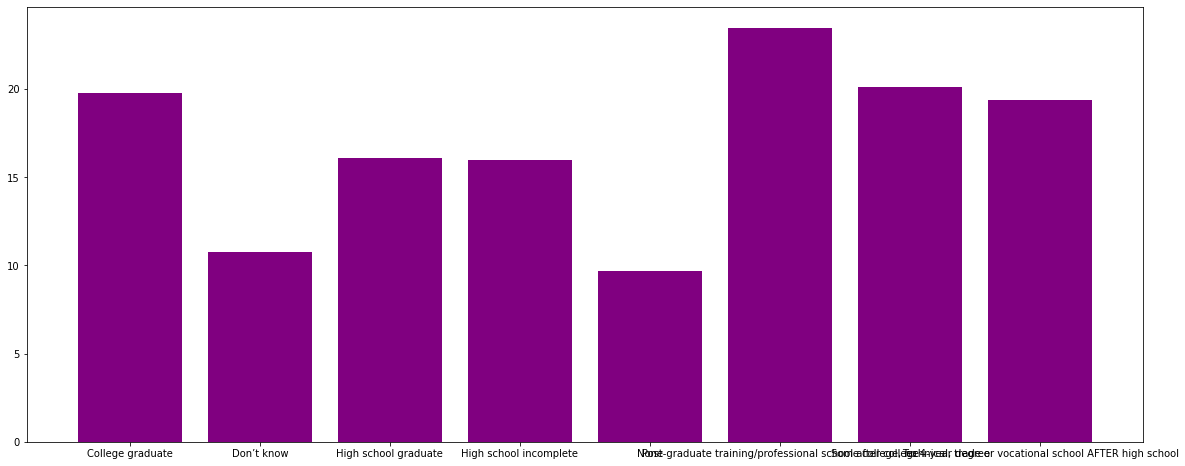

In [297]:
#График 1

fig, ax = plt.subplots(figsize = (20,8)) 

ax.bar(dependency.index, dependency, color='purple')

Мы видим распределение в зависимости от уровня образования. Судя по результатам, можем сделать следующие выводы:

1. Люди без образования прочитали книг за год ниже среднего на 0.4
    
2. Люди с самым высоким уровнем образования (Post-graduate training/professional school after college) прочитали выше среднего на 0.2

График 1 подтверждает данные выводы.    
Таким образом, мы видим, что уровень образования тесно взаимосвязан с показателем количества прочитанных за год, что подтверждает первую гипотезу: чем выше уровень образования, тем больше прочитанных за год книг


# Правда ли, что, чем старше респондент, тем больше книг за год он прочитал?

Для определения данной зависимости можем использовать коэффициент корреляции

In [220]:
df_read.corr()

,Возраст,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Чтение новостей или газет,Чтение журналов,Настоящий читатель,Любитель периодической печати,z-score
Возраст,1.000000,0.094028,0.039545,0.021902,-0.058294,0.247989,0.147284,0.034002,0.223053,0.094028
Количество прочитанных книг за год,0.094028,1.000000,0.090432,0.120585,0.167150,0.069396,0.110154,0.138719,0.110811,1.000000
Чтение печатных книг за год,0.039545,0.090432,1.000000,-0.029649,-0.113370,0.026355,0.083444,0.057028,0.069904,0.090432
Прослушивание аудиокниг за год,0.021902,0.120585,-0.029649,1.000000,0.174581,0.031739,0.097475,0.452115,0.075385,0.120585
Чтение электронных книг за год,-0.058294,0.167150,-0.113370,0.174581,1.000000,0.056696,0.076494,0.294935,0.073149,0.167150
Чтение новостей или газет,0.247989,0.069396,0.026355,0.031739,0.056696,1.000000,0.186725,0.154151,0.630641,0.069396
Чтение журналов,0.147284,0.110154,0.083444,0.097475,0.076494,0.186725,1.000000,0.175169,0.716625,0.110154
Настоящий читатель,0.034002,0.138719,0.057028,0.452115,0.294935,0.154151,0.175169,1.000000,0.244436,0.138719
Любитель периодической печати,0.223053,0.110811,0.069904,0.075385,0.073149,0.630641,0.716625,0.244436,1.000000,0.110811
z-score,0.094028,1.000000,0.090432,0.120585,0.167150,0.069396,0.110154,0.138719,0.110811,1.000000


В данной таблице присутствуют все цифровые значения, хотя некоторые не могут быть использованы, так как их числовые обозначения несут толко бинарный характер (1 и 0)

<AxesSubplot:>

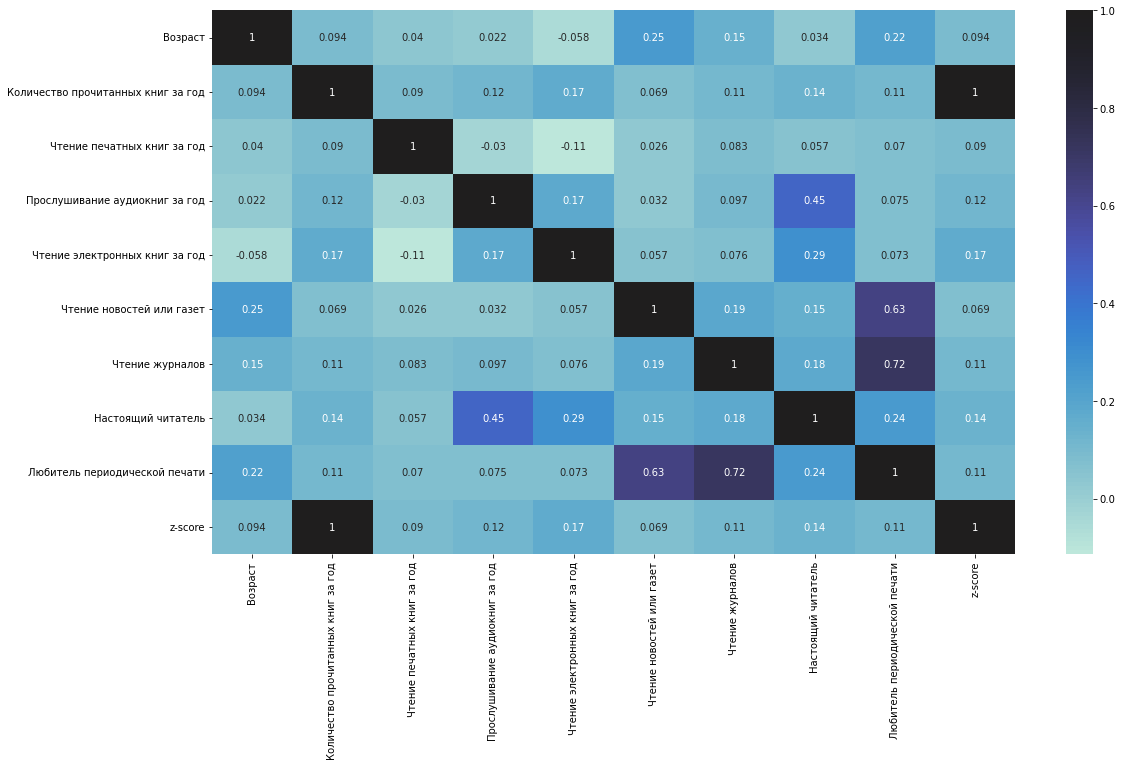

In [221]:
plt.figure(figsize = (18,10))
sns.heatmap(df_read.corr(), annot = True, center = 1)

In [222]:
df_read['Возраст'].corr(df_read['Количество прочитанных книг за год'])

0.09402816345111413

<AxesSubplot:xlabel='Возраст', ylabel='Количество прочитанных книг за год'>

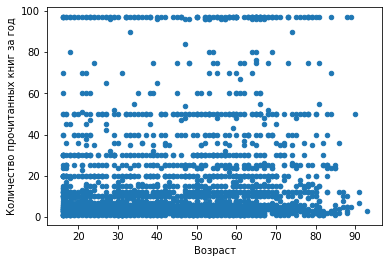

In [223]:
df_read.plot('Возраст','Количество прочитанных книг за год', kind='scatter')

Значение коэффициента корреляции согласно классификации ниже, чем слабая (0.1). Таким образом, можем сделать вывод, что взаимосвязь возраста и количества прочитанных книг за год практически отсутствует

In [224]:
df_read.groupby('Возраст')['Количество прочитанных книг за год'].sum()

Возраст
16    1356
17     988
18     703
19     654
20     509
      ... 
88     127
89     102
90      50
91      19
93       3
Name: Количество прочитанных книг за год, Length: 77, dtype: int64

Узнав суммарное значение количества прочитанных книг за год, и отфильтровав их по возрасту, можем сказать, что возраст никак не влияет частоту чтения книг в течение года. Гипотеза "чем старше респондент, тем больше книг он прочитал, не подтверждена.

# Правда ли, что люди с высоким уровнем дохода читают больше книг?

В данном случае нам помогут выбросы, соотнесенные с доходом. Проследим, есть ли какой-либо разброс по доходу

In [250]:
df_read[df_read['Количество прочитанных книг за год'] > iqr_outlier_threshold_up] ['Доход'].value_counts(ascending = False)

$100,000 to under $150,000     46
$50,000 to under $75,000       29
Refused                        19
$75,000 to under $100,000      18
9$100,000 to under $150,000    17
$30,000 to under $40,000       16
$20,000 to under $30,000       15
$10,000 to under $20,000       14
Less than $10,000              13
$40,000 to under $50,000       11
Name: Доход, dtype: int64

Видим, что выбросов больше всего там, где находятся значения с высоким уровнем дохода. Таким образом, это обуславиливает проявление большего интереса к чтению. Видимо, в связи с тем, что есть возможность купить печатную, электронную или аудиокнигу. 

# Правда ли, что женщины прочитали большее количество книг за год?

Выберем отельно женщин, отдельно мужчин и определим медиану для каждого признака по переменной "Количество прочитанных книг за год"

In [226]:
df_read[df_read['Пол'] == 'Female']['Количество прочитанных книг за год'].median()

10.0

In [227]:
df_read[df_read['Пол'] == 'Male']['Количество прочитанных книг за год'].median()

8.0

In [228]:
df_read.groupby('Пол')['Количество прочитанных книг за год'].mean()

Пол
Female    21.917231
Male      16.261456
Name: Количество прочитанных книг за год, dtype: float64

<BarContainer object of 2 artists>

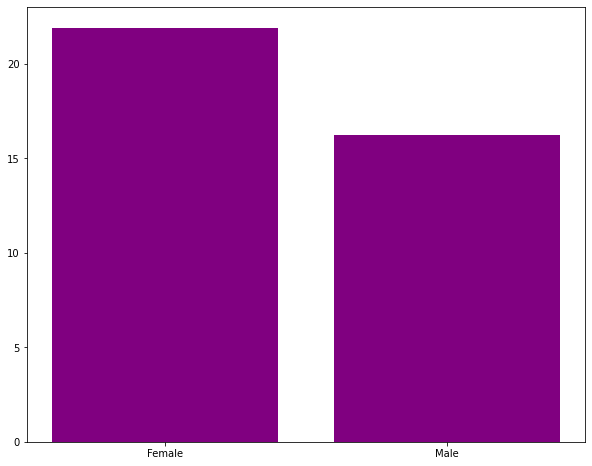

In [229]:
dependency = df_read.groupby('Пол')['Количество прочитанных книг за год'].mean()
fig, ax = plt.subplots(figsize = (10,8)) 

ax.bar(dependency.index, dependency, color= 'purple')


Таким образом, медиана и среднее значение у женской половины читателей больше, следовательно, **гипотеза подтверждается**. Наглядно результаты представлены на графике

# Правда ли, что не работающие респонденты прочитали больше книг за год?

In [230]:
df_read['Трудоустройство'].unique()

array(['Retired', 'Employed full-time', 'Employed part-time',
       'Have own business/self-employed', 'Student', 'Other',
       'Not employed for pay', 'Disabled'], dtype=object)

In [231]:
df_read.pivot_table(index='Трудоустройство',
                    values = ['Количество прочитанных книг за год'],
                    aggfunc=['median'])

,median
,Количество прочитанных книг за год
Трудоустройство,
Disabled,6
Employed full-time,10
Employed part-time,10
Have own business/self-employed,7
Not employed for pay,10
Other,7
Retired,12
Student,9


In [232]:
median_trud = df_read.pivot_table(index='Трудоустройство',
                    values = ['Количество прочитанных книг за год'],
                    aggfunc=['median'])

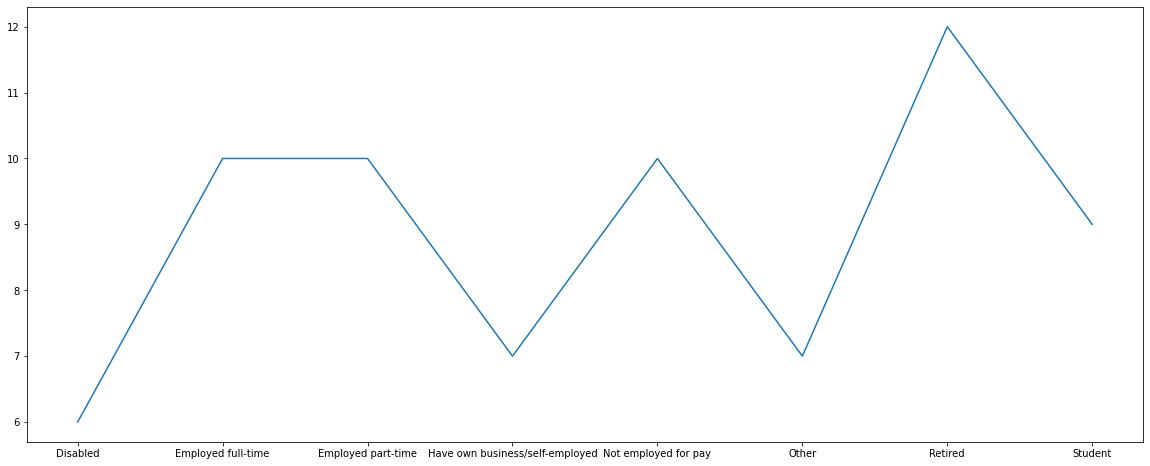

In [233]:
#Для наглядности построим линейный график


fig, ax = plt.subplots(figsize = (20,8)) 

ax.plot(median_trud)

Согласно медиане, наибольшее значение по количеству прочитанных книг имеют респонденты на пенсии ( в отставке), далее идут люди, которые устроены на полный и неполный рабочий день, а также "стажеры"(устроенные без оплаты) и студенты. По графику видно, что пиком медианного значения являются не работающие люди, находящиеся на пенсии. Это отчасти подтверждает гипотезу. Однако отрыв не слишком большой

# Правда ли, что электронные книги более популярны, чем аудиокниги и печатные издания?

In [234]:
df_read[df_read["Чтение печатных книг за год"] == 1].shape

(2264, 18)

In [235]:
df_read[df_read["Чтение электронных книг за год"] == 1].shape

(787, 18)

In [265]:
df_read[df_read["Прослушивание аудиокниг за год"] == 1].shape

(411, 18)

In [268]:
df_read[['Чтение печатных книг за год', 
         'Прослушивание аудиокниг за год', 
         'Чтение электронных книг за год']].sum()

Чтение печатных книг за год       2264
Прослушивание аудиокниг за год     411
Чтение электронных книг за год     787
dtype: int64

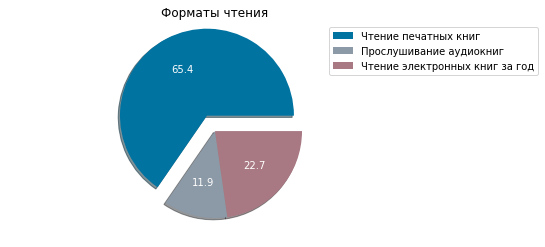

In [298]:
colors = ['#0073a1','#8c99a6', '#a87883']
labels = 'Чтение печатных книг', 'Прослушивание аудиокниг', 'Чтение электронных книг за год'
df_read[['Чтение печатных книг за год', 
         'Прослушивание аудиокниг за год', 
         'Чтение электронных книг за год']].sum().plot(kind='pie', 
                                                       colors = colors, 
                                                       explode = [0.2, 0, 0], 
                                                       shadow = True, 
                                                       title = 'Форматы чтения', 
                                                       autopct = '%.1f',
                                                       ylabel= '',
                                                       textprops = {'color': 'w'})
plt.legend(labels, loc="upper left", bbox_to_anchor=(1.0, 1.0))

В данном случае, мы можем сделать вывод, что печатные книги пользуются наибольшей популярностью у респондентов в сравнении с остальными различными способами чтения - электронными и аудиокнигами. На втором месте находятся электронные книги.

# Люди с высоким и очень высоким уровнем дохода читают больше печатных книг

Определим, есть ли зависимость между чтением печатных книг и уровнем дохода

In [248]:
df_read.groupby('Уровень дохода')['Чтение печатных книг за год'].value_counts()

Уровень дохода  Чтение печатных книг за год
Refused         1                              232
                0                               14
Высокий         1                              267
                0                               19
Выше среднего   1                              714
                0                               45
Низкий          1                              102
                0                               15
Очень высокий   1                              615
                0                               61
Средний         1                              334
                0                               24
Name: Чтение печатных книг за год, dtype: int64

Чтением печатных книг увлекаются люди с высоким (267 респондентов) и очень высоким уровнем дохода (615 респондентов). В общем итоге 882 человека, к этому значению приближаются респонденты, читающие печатные книги, но обладающие уровнем дохода выше среднего (714 респондентов). Таким образом, можно сказать, что, чем выше уровень дохода, тем больше людей читает печатные книги. Предположительно, это связано с довольно высокой ценой на печатную продукцию, в том числе книги

# Среди взрослого поколения (>40 лет) больше "Любителей периодической печати"

In [238]:
df_read['Любитель периодической печати'].value_counts()

0    1443
1     999
Name: Любитель периодической печати, dtype: int64

In [239]:
df_read[(df_read['Любитель периодической печати'] == 1) & (df_read['Возраст'] >= 40)]

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов,Настоящий читатель,Любитель периодической печати,Уровень дохода,z-score
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,1,1,1,Purchased the book,1,1,1,1,Низкий,3.181283
7,60,Female,Black or African-American,Married,College graduate,Retired,"$100,000 to under $150,000",97,1,0,0,Purchased the book,1,1,0,1,Очень высокий,3.181283
13,89,Female,White,Widowed,"Some college, no 4-year degree",Retired,"$30,000 to under $40,000",97,1,0,0,Purchased the book,1,1,0,1,Выше среднего,3.181283
15,84,Female,White,Widowed,"Some college, no 4-year degree",Retired,"9$100,000 to under $150,000",97,1,0,0,Borrowed the book from a friend or family member,1,1,0,1,Очень высокий,3.181283
16,81,Female,White,Married,"Some college, no 4-year degree",Retired,"$75,000 to under $100,000",97,1,0,0,Purchased the book,1,1,0,1,Высокий,3.181283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,50,Male,White,Married,"Some college, no 4-year degree",Employed full-time,"$100,000 to under $150,000",1,1,0,0,Borrowed the book from a friend or family member,1,1,0,1,Очень высокий,-0.751258
2381,49,Male,White,Married,"Some college, no 4-year degree",Employed full-time,"$75,000 to under $100,000",1,1,0,0,Purchased the book,1,1,0,1,Высокий,-0.751258
2387,46,Female,White,Living with a partner,High school graduate,Employed full-time,"$50,000 to under $75,000",1,1,0,0,8,1,1,0,1,Выше среднего,-0.751258
2388,46,Male,White,Married,Post-graduate training/professional school aft...,Employed full-time,"$100,000 to under $150,000",1,1,1,0,Purchased the book,1,1,0,1,Очень высокий,-0.751258


In [240]:
df_read[(df_read['Любитель периодической печати'] == 1) & (df_read['Возраст'] < 40)]

,Возраст,Пол,Расовая принадлежность,Семейное положение,Уровень образования,Трудоустройство,Доход,Количество прочитанных книг за год,Чтение печатных книг за год,Прослушивание аудиокниг за год,Чтение электронных книг за год,Откуда последняя прочитанная книга,Чтение новостей или газет,Чтение журналов,Настоящий читатель,Любитель периодической печати,Уровень дохода,z-score
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,0,1,1,Borrowed the book from a friend or family member,1,1,0,1,Низкий,3.181283
10,23,Male,Black or African-American,Never been married,High school graduate,Employed part-time,"9$100,000 to under $150,000",97,1,0,0,Borrowed the book from a friend or family member,1,1,0,1,Очень высокий,3.181283
11,19,Female,Black or African-American,Never been married,"Some college, no 4-year degree",Employed part-time,"$50,000 to under $75,000",97,1,0,0,Got the book some other way,1,1,0,1,Выше среднего,3.181283
89,38,Male,White,Married,College graduate,Not employed for pay,Refused,97,1,0,1,Got the book some other way,1,1,0,1,Refused,3.181283
91,38,Female,White,Married,College graduate,Have own business/self-employed,"$100,000 to under $150,000",97,1,0,1,Purchased the book,1,1,0,1,Очень высокий,3.181283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,31,Male,White,Married,Post-graduate training/professional school aft...,Employed full-time,"$100,000 to under $150,000",1,1,0,1,Got the book some other way,1,1,0,1,Очень высокий,-0.751258
2417,30,Male,White,Living with a partner,"Some college, no 4-year degree",Employed full-time,"$50,000 to under $75,000",1,1,0,0,Purchased the book,1,1,0,1,Выше среднего,-0.751258
2419,29,Male,White,Married,"Some college, no 4-year degree",Employed full-time,"$50,000 to under $75,000",1,1,0,0,Got the book some other way,1,1,0,1,Выше среднего,-0.751258
2427,24,Male,White,Never been married,College graduate,Employed full-time,"$50,000 to under $75,000",1,0,0,1,Purchased the book,1,1,0,1,Выше среднего,-0.751258


Среди тех, кому более или равно 40 лет, 734 представителя, которые читают и газеты, и журналы, являясь любителем чтения периодической печати. Среди тех, кому меньше 40 лет, всего 288 представителям интересно читать периодику. Исходя из полученных результатов, мы можем заключить, что чтением периодики интересуются в большей степени более зрелые респонденты. 

# Итоговые выводы по датасету

1.	Чем выше уровень образования, тем больше итоговое количество книг, прочитанных за год

2.	Возрастной показатель мало влияет на общее количество прочитанных за год книг и не является привилегией старшего поколения, согласно данному датасету

3.	Люди с высоким и очень высоким уровнем дохода суммарно читают большее количество книг и могут позволить себе покупку печатных книг

4.	У женщин проявлен больший интерес к чтению, чем у мужской половины

5.	Отсутствие рабочей нагрузки незначительно повышает интерес к чтению (в связи с наличием свободного времени), однако это не является поводом для полного отказа от чтения

6.	Несмотря на темпы жизни 21 века, печатная книга все еще занимает лидирующее место (с со значительным отрывом в 43%) среди других форматов чтения

7.	Чтение периодической печати (газет и журналов) в большей степени привлекает людей старшего поколения 

# Спасибо за прочтение!